<a href="https://colab.research.google.com/github/joshuaidumijie/Hamoye-Internship-2020/blob/master/The_Great_Food_Divide_by_Joshua_Idumijie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Great Food Divide 

Food is one of the critical needs that makes our time here on earth, well, possible! Like Newton rightly postulated, we need to convert some matter or energy into what we call food; and here comes Agriculture to the rescue. The Nations of Africa, like her sister Nations on other continents, are faced with her unique food challenges. The FAO claims that globally 2 out of 10 children go to bed hungry; it is worse in African Nations. However, this is not a common thing throughout the Africa nations.

Our report captures the short duration, 2004 to 2013. The datasets were gotten from Hamoye's Data Storytelling Internship Stage C. This data set captures the food production and supply of Africa nations, coupled with the population data to help us better decipher if the food produced by a country is sufficient.


###Data Cleaning, Transformation and Exploration


In [2]:
#importing important packages to allow us make beauty with our data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt;

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Making the outputs more readable

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Use 3 decimal places in output display
pd.set_option("display.precision", 4)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)


In [4]:
#importing the food production in Africa as df1

df1 = pd.read_csv('https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv')

#importing the food supply in Africa as df2

df2 = pd.read_csv('https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Supply%20(2004%20-%202013).csv')

#importing the Population Data in Africa as dfp

dfp = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')


In [5]:
#For df1 (Foof Production)
#making the data set a DataFrame
df1 = pd.DataFrame(df1)
df1.head(3)

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688


In [6]:
#manually exploring the data
df1.info

<bound method DataFrame.info of         Country                Item  Year  Value
0       Algeria  Wheat and products  2004   2731
1       Algeria  Wheat and products  2005   2415
2       Algeria  Wheat and products  2006   2688
3       Algeria  Wheat and products  2007   2319
4       Algeria  Wheat and products  2008   1111
...         ...                 ...   ...    ...
23105  Zimbabwe         Crustaceans  2009      0
23106  Zimbabwe         Crustaceans  2010      0
23107  Zimbabwe         Crustaceans  2011      0
23108  Zimbabwe         Crustaceans  2012      0
23109  Zimbabwe         Crustaceans  2013      0

[23110 rows x 4 columns]>

In [7]:
#check for mssing values 

df1.isnull().sum()

#no mssing values

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [8]:
#check for duplicates

df1.duplicated().sum()

#no duplicates

0

In [9]:
countries = pd.DataFrame(df1['Country'].unique())
countries

,0
0,Algeria
1,Angola
2,Benin
3,Botswana
4,Burkina Faso
5,Cabo Verde
6,Cameroon
7,Central African Republic
8,Chad
9,Congo


In [10]:
df1['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])

In [11]:
#Grouping by Country and Year and summing the quantity of food produced

df1_CY = df1.groupby(['Country','Year'], as_index = False).sum()
df1_CY.head(20)

,Country,Year,Value
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841
5,Algeria,2009,19820
6,Algeria,2010,20263
7,Algeria,2011,21778
8,Algeria,2012,24206
9,Algeria,2013,26359


In [12]:
df2 = pd.DataFrame(df2)

#Transforming the data set to a Data Frame

In [13]:
#Check for missing values
df2.isnull().sum()
#no missing values exist

Country    0
Year       0
Value      0
dtype: int64

In [14]:
#Check for Duplicates
df2.duplicated().sum()

#No duplicates exist

0

In [15]:
dfp

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448
280928,716,Zimbabwe,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205
280929,716,Zimbabwe,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483
280930,716,Zimbabwe,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421


In [16]:
dfp.drop(['Variant','MidPeriod','PopMale','PopFemale','PopDensity'], axis=1, inplace=True)
dfp

,LocID,Location,VarID,Time,PopTotal
0,4,Afghanistan,2,1950,7752.117
1,4,Afghanistan,2,1951,7840.151
2,4,Afghanistan,2,1952,7935.996
3,4,Afghanistan,2,1953,8039.684
4,4,Afghanistan,2,1954,8151.316
...,...,...,...,...,...
280927,716,Zimbabwe,207,2080,21836.893
280928,716,Zimbabwe,207,2085,21355.988
280929,716,Zimbabwe,207,2090,20689.956
280930,716,Zimbabwe,207,2095,19892.080


In [17]:
dfp_C = dfp.groupby(['Location'])['PopTotal'].sum()

dfp_C

Location
Afghanistan                                                                                  6.3768e+07
Africa                                                                                       2.4864e+09
African Group                                                                                2.7536e+08
African Union                                                                                2.7546e+08
African Union: Central Africa                                                                3.6333e+07
African Union: Eastern Africa                                                                8.0192e+07
African Union: Northern Africa                                                               3.3136e+07
African Union: Southern Africa                                                               3.7466e+07
African Union: Western Africa                                                                8.8329e+07
African, Caribbean and Pacific (ACP) Group of States   

###The Story begins

The visualization of the food production data suggests that Nigeria, Egypt, and South Africa are the highest producers in 2004 and maintained this trend to 2013 while on the opposite end, Djibouti, Sao Tome & Principle, and Cape Verde maintained the lower position throughout the study time

However, before we conclude on that, let's confirm if that's the complete truth; in a bid not to judge this book by its cover.



In [18]:
#To make the legend readable we reduce the font size
from matplotlib.font_manager import FontProperties
fontP = FontProperties()

fontP.set_size('small')



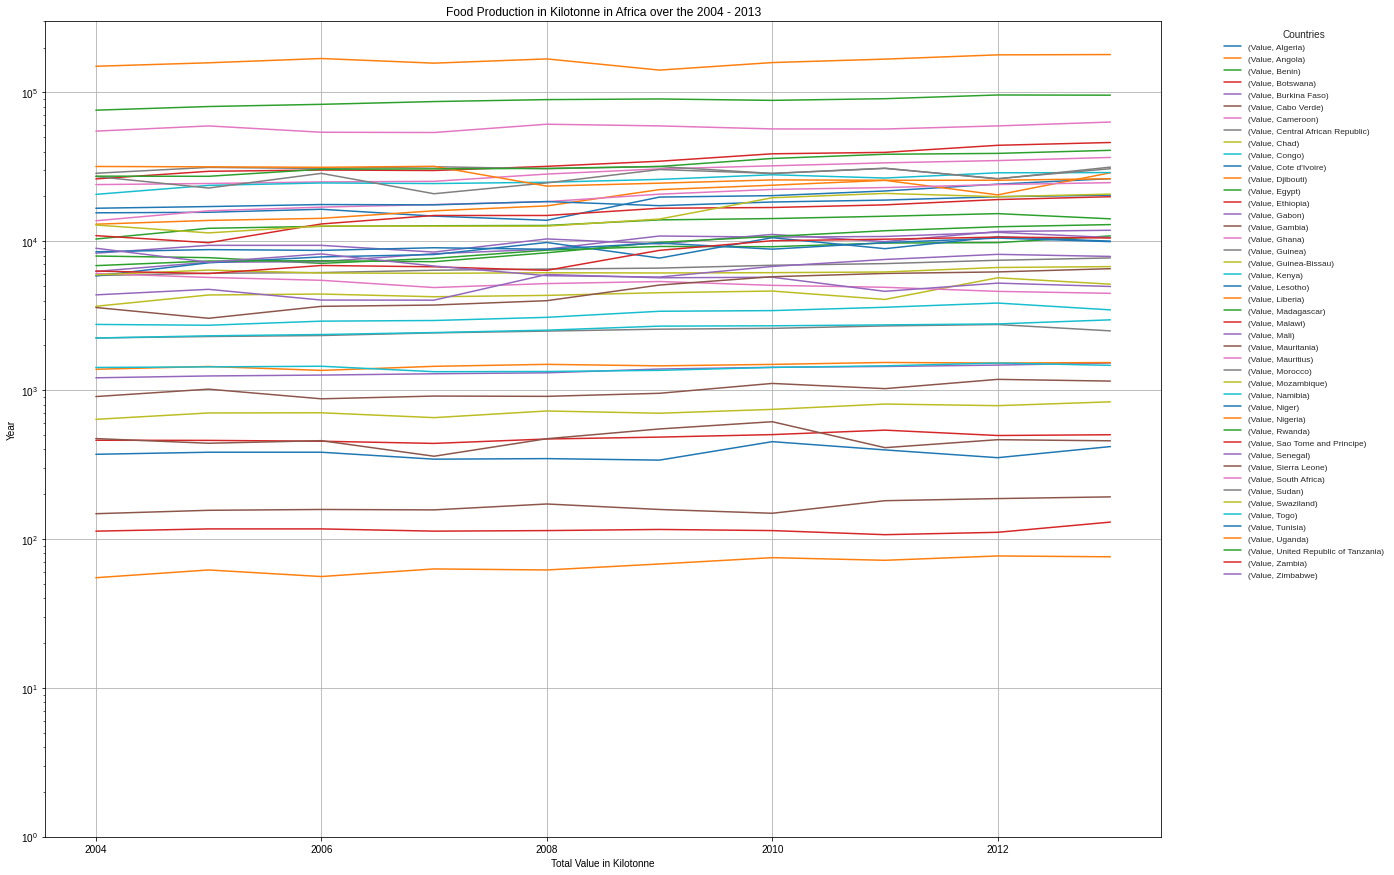

In [19]:
fig, ax = plt.subplots(figsize = (20,15))

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 

 
# create a color palette
palette = plt.get_cmap('Set1')

df1.groupby(['Year','Country',]).sum().unstack().plot(ax = ax)
ax.set_yscale('log')
ax.set_ylim(1,300000)
plt.ylabel('Year')
plt.xlabel('Total Value in Kilotonne')
plt.title('Food Production in Kilotonne in Africa over the 2004 - 2013')


plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

In [20]:
#checking the years of 2004 and 2013
df1_CY_2004 = df1_CY[df1_CY.Year == 2004]
df1_CY_2013 = df1_CY[df1_CY.Year == 2013]


In [21]:
#The largest food producers countries in 2004
df1_CY_2004.nlargest(3,'Value')

,Country,Year,Value
310,Nigeria,2004,149857
120,Egypt,2004,75989
360,South Africa,2004,54949


In [22]:
#The smallest food producers in 2004
df1_CY_2004.nsmallest(3,'Value')

,Country,Year,Value
110,Djibouti,2004,55
330,Sao Tome and Principe,2004,113
50,Cabo Verde,2004,148


In [23]:
df1_CY_2013.nlargest(3,'Value')

,Country,Year,Value
319,Nigeria,2013,179631
129,Egypt,2013,95848
369,South Africa,2013,63263


In [24]:
df1_CY_2013.nsmallest(3,'Value')

,Country,Year,Value
119,Djibouti,2013,76
339,Sao Tome and Principe,2013,130
59,Cabo Verde,2013,192


In [25]:
#Now let's consider the Food supply
df2_CY = df2.groupby(['Country','Year'], as_index = False).sum()


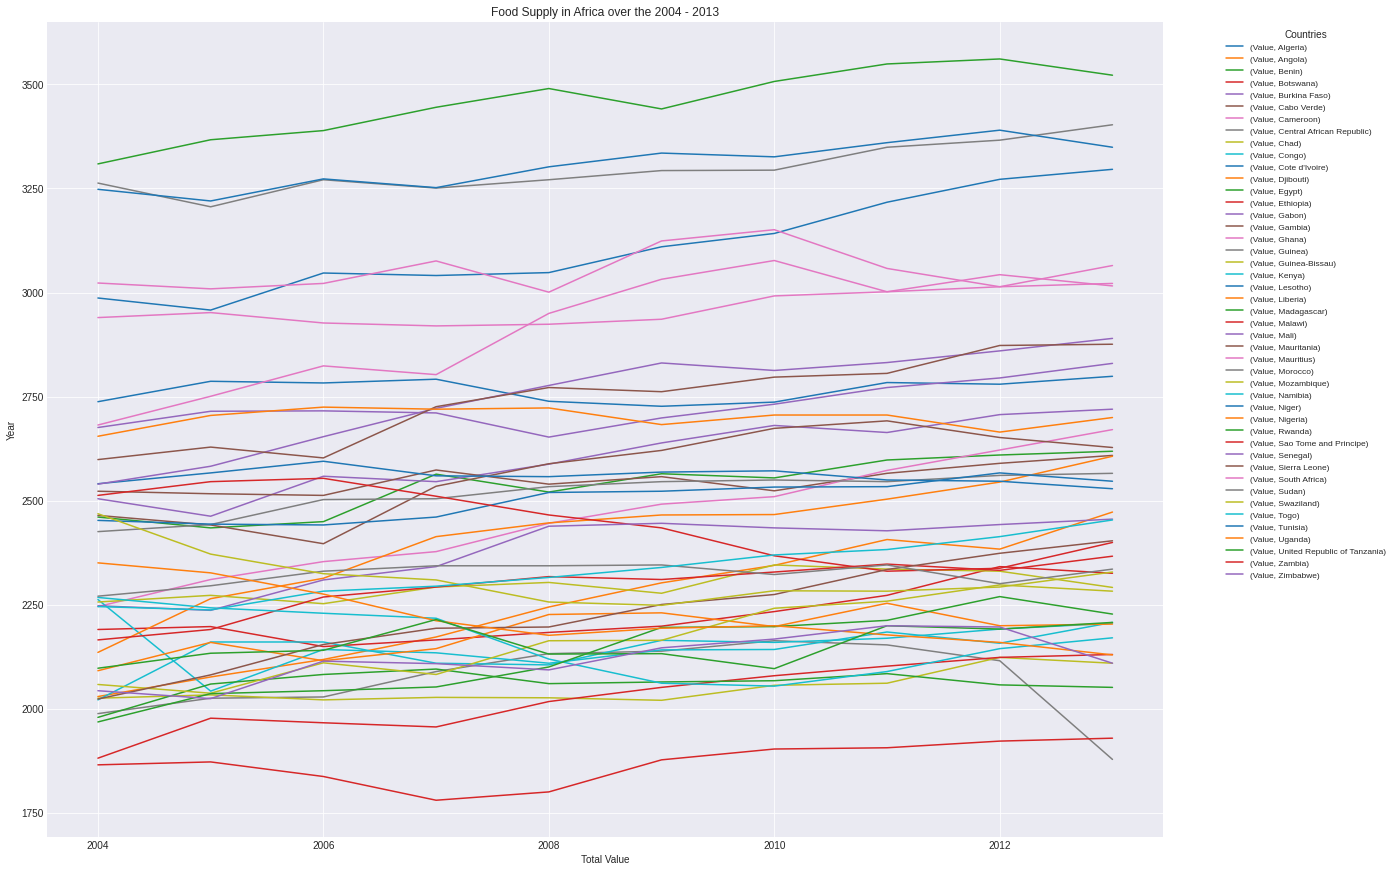

In [26]:
fig, ax = plt.subplots(figsize = (20,15))

# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

df2.groupby(['Year','Country',]).sum().unstack().plot(ax = ax)


plt.ylabel('Year')
plt.xlabel('Total Value')
plt.title('Food Supply in Africa over the 2004 - 2013')


plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

In [64]:

df2_CY_2004 = df2_CY[df2_CY.Year == 2004]
df2_CY_2006 = df2_CY[df2_CY.Year == 2006]
df2_CY_2005 = df2_CY[df2_CY.Year == 2005]


In [28]:
df2_CY_2004.nlargest(3,'Value')

,Country,Year,Value
120,Egypt,2004,3309
270,Morocco,2004,3263
400,Tunisia,2004,3248


In [66]:
df2_CY_2004.nsmallest(4,'Value')

,Country,Year,Value
430,Zambia,2004,1866
130,Ethiopia,2004,1882
320,Rwanda,2004,1969
220,Madagascar,2004,1980


In [67]:
df2_CY_2006.nsmallest(4,'Value')

,Country,Year,Value
432,Zambia,2006,1838
132,Ethiopia,2006,1967
82,Chad,2006,2022
72,Central African Republic,2006,2029


In [68]:
df2_CY_2005.nsmallest(4,'Value')

,Country,Year,Value
431,Zambia,2005,1873
131,Ethiopia,2005,1978
441,Zimbabwe,2005,2025
71,Central African Republic,2005,2026


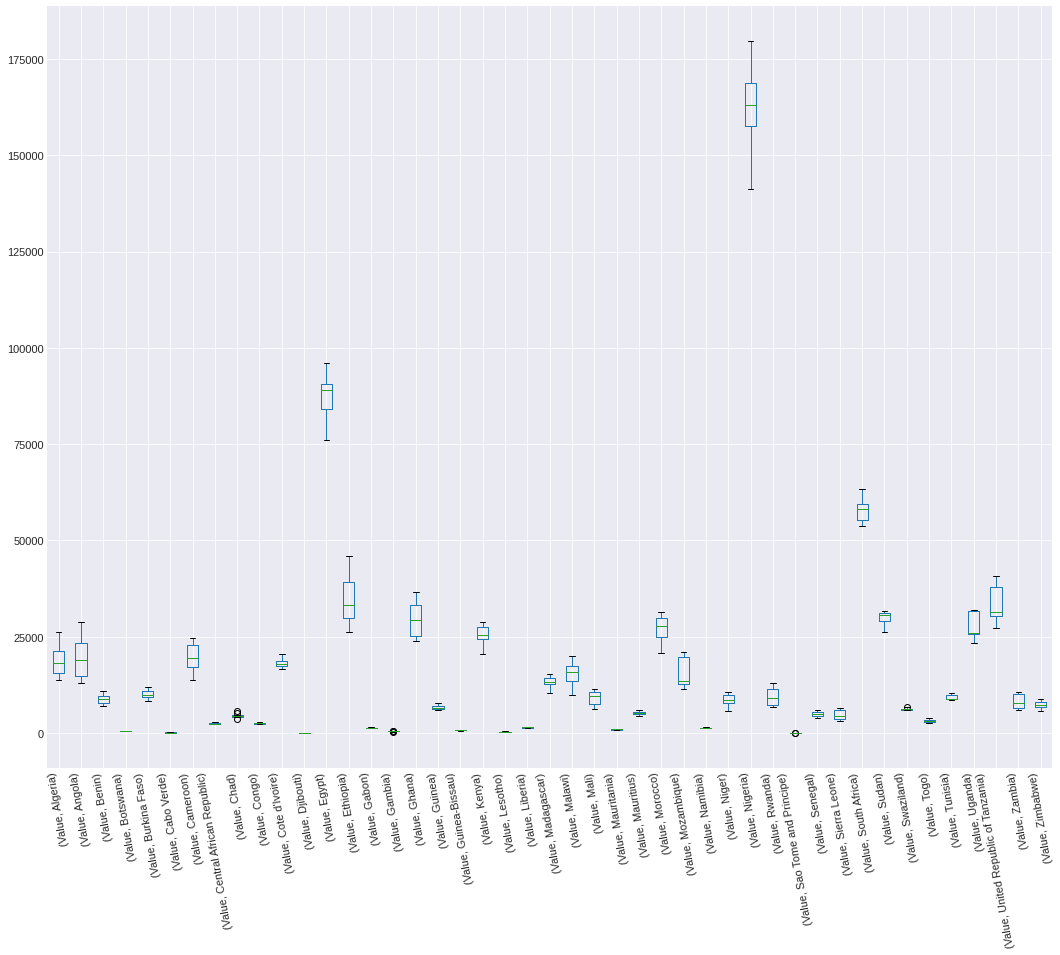

In [34]:
grouped = df1.groupby(['Year','Country',]).sum().unstack()

grouped.boxplot(rot=100, fontsize=11, figsize=(18,14))

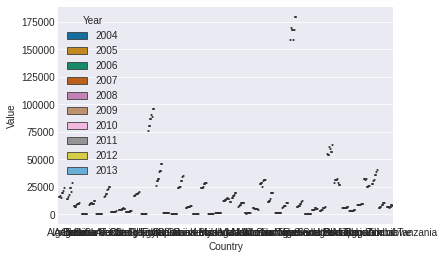

In [52]:
sns.boxplot(y='Value', x='Country', 
                 data=df1_CY, 
                 palette="colorblind",
                 hue='Year')

 

###Conclusion

To help us put this into perspective, the food supply is Kcal(unit of energy) for a day for 1 person. And, the food produced is Kilotonne per annum.

Next let's find out if the population of these nations influences their production rate. To do this, let's build a model.

The relation of the population of Africa nations are correlated with the production of food but does not cause this. To find this out, one will have to build a model and based on background knowledge choose suitable independent variable like level of technology in Agriculture.

Nations like USA have low population as farmers but with high technological advancement, they have higher outputs compared to some African Nations that has higher populations of farmers.

The great divide can be reduced by increasing the level of technology in Agriculture in Africa, utilising a efficient storage systems and proper management of products. Training farmers to leverage on the power of technology is a must if Africa will achieve food sustainability.



###Quiz

In [71]:
dfff = df1.groupby(['Country','Item','Year'], as_index = False).sum()

#to check the highest producers of oats 
do = dfff[dfff.Item == 'Oats']
do.nlargest(9,'Value')

,Country,Item,Year,Value
329,Algeria,Oats,2013,113
328,Algeria,Oats,2012,110
325,Algeria,Oats,2009,96
13527,Morocco,Oats,2011,96
323,Algeria,Oats,2007,92
320,Algeria,Oats,2004,89
322,Algeria,Oats,2006,89
326,Algeria,Oats,2010,88
321,Algeria,Oats,2005,78


In [74]:
#to confirm the highest producers of rice

dr = dfff[dfff.Item == 'Rice (Milled Equivalent)']
dr.nlargest(30,'Value')

,Country,Item,Year,Value
6174,Egypt,Rice (Milled Equivalent),2008,4838
6173,Egypt,Rice (Milled Equivalent),2007,4587
6172,Egypt,Rice (Milled Equivalent),2006,4506
6170,Egypt,Rice (Milled Equivalent),2004,4237
6171,Egypt,Rice (Milled Equivalent),2005,4086
6178,Egypt,Rice (Milled Equivalent),2012,3943
6179,Egypt,Rice (Milled Equivalent),2013,3818
6177,Egypt,Rice (Milled Equivalent),2011,3785
6175,Egypt,Rice (Milled Equivalent),2009,3682
15838,Nigeria,Rice (Milled Equivalent),2012,3224


In [75]:
#df2_CY was created by groupby function but creating a new index
#to find out the countries with the lowest food supply for 2004 - 2006

#seperate the rrequired years
df2_CY_2004 = df2_CY[df2_CY.Year == 2004]
df2_CY_2006 = df2_CY[df2_CY.Year == 2006]
df2_CY_2005 = df2_CY[df2_CY.Year == 2005]

In [78]:
#check for the smallest value for 2004 

df2_CY_2004.nsmallest(4,'Value')

,Country,Year,Value
430,Zambia,2004,1866
130,Ethiopia,2004,1882
320,Rwanda,2004,1969
220,Madagascar,2004,1980


In [77]:
#check for the smallest value for 2005

df2_CY_2005.nsmallest(4,'Value')


,Country,Year,Value
431,Zambia,2005,1873
131,Ethiopia,2005,1978
441,Zimbabwe,2005,2025
71,Central African Republic,2005,2026


In [76]:
#check for the smallest value for 2006
df2_CY_2006.nsmallest(4,'Value')

,Country,Year,Value
432,Zambia,2006,1838
132,Ethiopia,2006,1967
82,Chad,2006,2022
72,Central African Republic,2006,2029
